# ~MegaMachine~

**Copyright@~MEGAMACHINE~**; 

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License. You may obtain a copy of the License at https://www.apache.org/licenses/LICENSE-2.0. Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

**Disclosure: Heart disease and failure prediction using Test results and Clinical records during these lectures is only taken as the general example to show, how one can do data analysis using pandas (in python). Data in these records is idealized to meet the machine model requirements. In real-life scenarios, these predictions may not be applicable. Please consider the specialist / doctors before application to the real-life scenarios of this type of dataset.  I would be not responsible for any kind of harm/loss to you.**

In [2]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn; 
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation); 
#                  https://docs.python.org/3.7/ (Recommended version – 3.7). 
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html 

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 
from scipy.stats import norm 
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific 
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived 
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, 
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, 
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/ 
#     Docs: https://pandas.pydata.org/docs/ 
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html 
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a 
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

# scipy : SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. 
#         It adds significant power to the interactive Python session by providing the user with high-level commands and classes 
#         for manipulating and visualizing data. 
#   About: https://docs.scipy.org/doc/scipy/index.html 
#   scipy.stats.norm: A normal continuous random variable -> scipy.stats.norm(x,loc=0,scale=0)
#                   : The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.7.11
numpy version: 1.19.5
pandas version:  1.1.5
seaborn version: 0.11.1
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>


# About Dataset – Heart failure clinical records Data Set

**Abstract**: A detailed description of the dataset can be found in the Dataset section of the following paper: Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link](https://doi.org/10.1186/s12911-020-1023-5) 

Dataset source ([ics.uci](https://archive.ics.uci.edu/ml/index.php)): Dataset source (ics.uci): https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records   
Dataset download links ([heart_failure_clinical_records_dataset.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv)), drive link: [direct_drive_link](https://drive.google.com/drive/folders/1NQP-8jhu1rmKbdrhbw-eAzx7e9VyzB2D?usp=sharing) 


This file is avilable at: https://drive.google.com/drive/folders/1wz7LPyb44dKfnPG6iC6NuPScr03daOEv?usp=sharing

**NOTE: Data is available under education license only. Don’t use dataset other than educational purposes.**

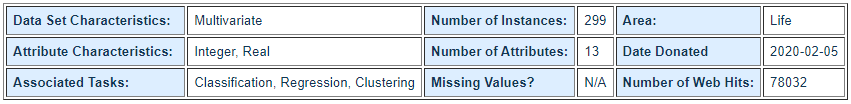

## downlaoding data / read data

In [3]:
# data link - https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv
# !wget -qq https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv 

heart_failure_=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv',)

# see head
heart_failure_.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# classes 
heart_failure_.DEATH_EVENT.unique()

array([1, 0])

In [5]:
# data set shape
heart_failure_.shape

(299, 13)

## data stats 

In [6]:
# info 
heart_failure_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# numpy.nan 
heart_failure_.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# as null values are mark by - '?'
list(heart_failure_.where(heart_failure_=='?').fillna(0).values.reshape(-1)).count('?') # total null values 

0

## [Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

Source: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html

In [9]:
# drop all rows having any null values and get data ---
X,y=heart_failure_.values[:,:-1],heart_failure_.DEATH_EVENT.values
'Data shape:',X.shape,y.shape

('Data shape:', (299, 12), (299,))

In [10]:
# F score and Mutual Information of features 
from sklearn.feature_selection import f_classif,mutual_info_classif
# source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html
# source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

# get f-score - linear dependency
f_score,p_value=f_classif(X,y)
# normalize f-score 
f_score/=max(f_score)

# get mutual information - dependency as - xi is discriminative feature or not 
mutual_dependence=mutual_info_classif(X,y)
# normalize
mutual_dependence/=max(mutual_dependence)

In [11]:
# over all results 
result_fs_=pd.DataFrame(heart_failure_.columns[:-1],columns=['feature'])
# add results
result_fs_['f_score']=f_score
result_fs_['mutual_dependence']=mutual_dependence
result_fs_['over_all']=f_score*mutual_dependence

# see results 
result_fs_

,feature,f_score,mutual_dependence,over_all
0,age,0.178978,0.285821,0.051156
1,anaemia,0.011474,0.120310,0.001380
2,creatinine_phosphokinase,0.010275,0.116916,0.001201
3,diabetes,0.000010,0.000000,0.000000
4,ejection_fraction,0.202258,0.235976,0.047728
5,high_blood_pressure,0.016482,0.161493,0.002662
6,platelets,0.006296,0.000000,0.000000
7,serum_creatinine,0.246612,0.413719,0.102028
8,serum_sodium,0.103041,0.000000,0.000000
9,sex,0.000048,0.000000,0.000000


## preprocess data

In [12]:
# Load min-max scaler  
from sklearn.preprocessing import normalize 
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

# scale X
X_scaled=normalize(X,norm='l2',axis=1) # axis=1 (Column wise,); or 0 (feature wise or row wise)

# x - scaled change 
X.shape,X_scaled.shape,X[0],X_scaled[0]

((299, 12),
 (299, 12),
 array([7.50e+01, 0.00e+00, 5.82e+02, 0.00e+00, 2.00e+01, 1.00e+00,
        2.65e+05, 1.90e+00, 1.30e+02, 1.00e+00, 0.00e+00, 4.00e+00]),
 array([2.83018139e-04, 0.00000000e+00, 2.19622076e-03, 0.00000000e+00,
        7.54715038e-05, 3.77357519e-06, 9.99997425e-01, 7.16979286e-06,
        4.90564774e-04, 3.77357519e-06, 0.00000000e+00, 1.50943008e-05]))

In [13]:
# load KMeans 
from sklearn.cluster import KMeans
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

sample_kmeans=list()

# Number of clusters 
for n in range(2,5):
  foo_KMean_algo=KMeans(n_clusters=n,n_init=50,max_iter=10000)
  # make cluster
  foo_KMean_algo.fit(X_scaled)
  sample_kmeans.append([foo_KMean_algo.labels_,foo_KMean_algo.inertia_,foo_KMean_algo.cluster_centers_])

# inertia_ - Sum of squared distances of samples to their closest cluster center.
[value[1] for value in sample_kmeans],[value[1]/len(value[0]) for value in sample_kmeans],[np.bincount(value[0]) for value in sample_kmeans]

([0.0017420549241437158, 0.0008927339088306884, 0.000617662592462156],
 [5.826270649310086e-06, 2.9857321365574863e-06, 2.0657611788031975e-06],
 [array([284,  15]), array([256,  10,  33]), array([ 84,  10,  22, 183])])

### Best cluster - Silhouette (clustering)?

Silhouette refers to a method of interpretation and validation of consistency within [clusters of data](https://en.wikipedia.org/wiki/Cluster_analysis). The technique provides a succinct graphical representation of how well each object has been classified.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) or the [Manhattan distance](https://en.wikipedia.org/wiki/Manhattan_distance).

Source: https://en.wikipedia.org/wiki/Silhouette_(clustering)

**Silhouette analysis** can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

From the thickness of the silhouette plot the cluster size can be visualized.

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


For n_clusters = 2 The average silhouette_score is : 0.8603346413114002
For n_clusters = 3 The average silhouette_score is : 0.7126978858537361
For n_clusters = 4 The average silhouette_score is : 0.5850709050140985
For n_clusters = 5 The average silhouette_score is : 0.5819051957880238
For n_clusters = 6 The average silhouette_score is : 0.5701465761773672


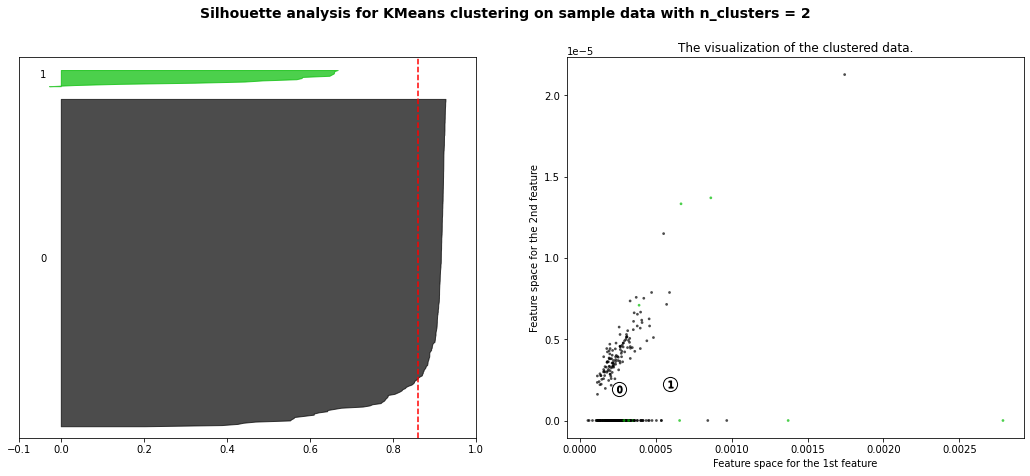

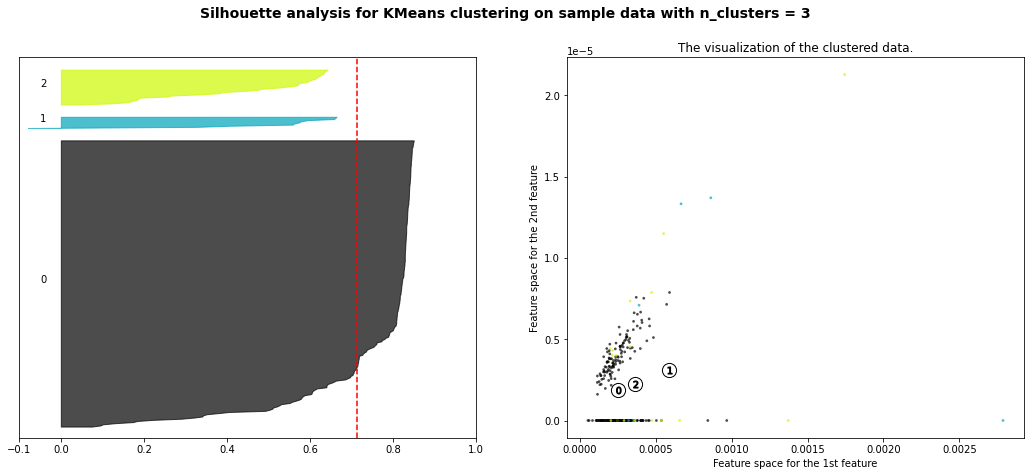

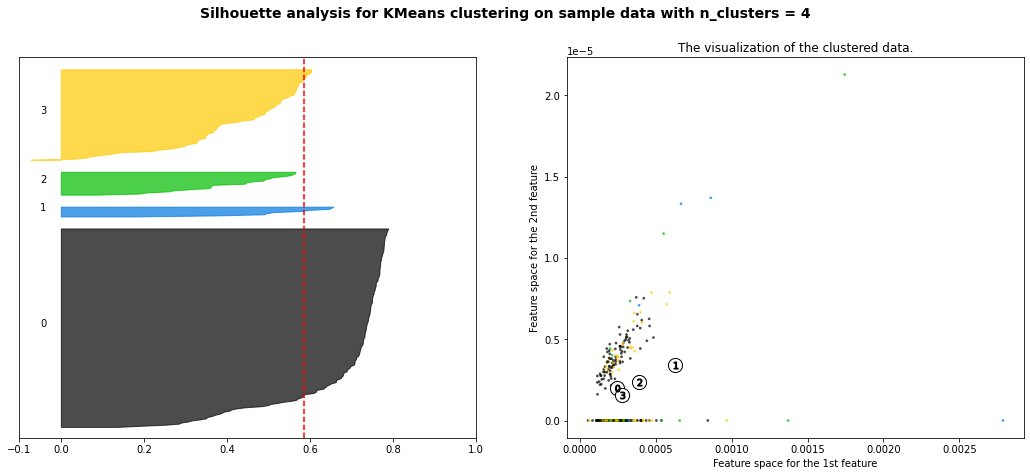

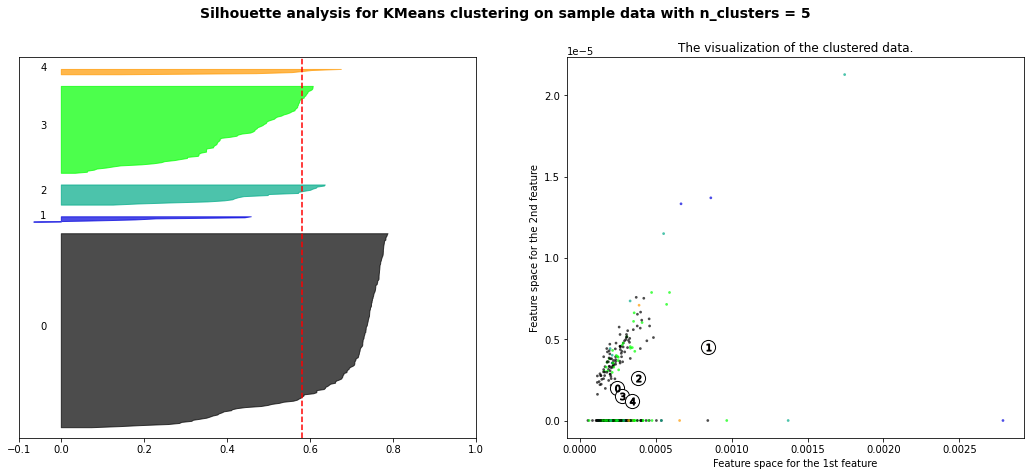

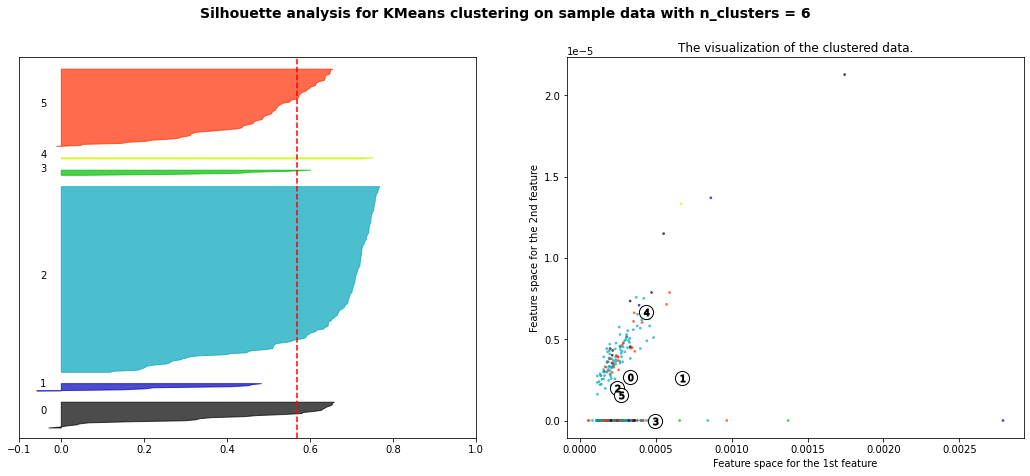

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples
#   silhouette_samples - Silhouette Coefficients for each sample.
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
#   silhouette_score - Mean Silhouette Coefficient for all samples.

import matplotlib.cm as cm

for n_clusters in range(2,7):
  
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0,X_scaled.shape[0]+(n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer_=KMeans(n_clusters=n_clusters,random_state=10)
  cluster_labels=clusterer_.fit_predict(X_scaled)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters
  silhouette_avg=silhouette_score(X_scaled,cluster_labels)
  print("For n_clusters =", n_clusters,"The average silhouette_score is :",silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values=silhouette_samples(X_scaled,cluster_labels)

  # y_lower plot level of y - axis to start 
  y_lower=10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i
    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))

    # Compute the new y_lower for next plot
    y_lower=y_upper+10  # 10 for the 0 samples

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

  ###########################################################################################################

  # 2nd Plot showing the actual clusters formed
  colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
  ax2.scatter(X_scaled[:,0],X_scaled[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k')

  # Labeling the clusters
  centers=clusterer_.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:,0],centers[:,1],marker='o',c="white",alpha=1,s=200,edgecolor='k')

  for i,c in enumerate(centers):
    ax2.scatter(c[0],c[1],marker='$%d$'%i,alpha=1,s=50,edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"%n_clusters),
               fontsize=14, fontweight='bold')

plt.show()

## Now what ?

* Have tried [DBSCAN](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)? 